### Overview  <a name='objectives' />

This notebook introduces you to Linear Regression and Regularized Linear Regression. 

The topics that will be covered are:

*  <a href=#st_line>Equation of a Straiht Line</a>
*  <a href=#pinv>Introduction to the Pseudo-inverse</a>
*  <a href=#dataset>Create a Dataset</a>
*  <a href=#split>Split the Dataset</a>
*  <a href=#least-sq-reg> General Form of Least-Squares Linear Regression </a>
*  <a href=#solve-least-sq-reg> Solve Least-Squares Linear Regression </a>
*  <a href=#vis_pred> Visualize predictions for different polynomial degrees </a>
*  <a href=#sq_error> Check the errors on the train and test set </a>
*  <a href=#overfit> Overfitting </a>
*  <a href=#wt_coeffs> Look at the coefficients (weights) </a>
*  <a href=#ridge> Regularization with Ridge Regression </a>
*  <a href=#ridge_error> Train and Test error with Regularization </a>
*  <a href=#ridge_coeffs> Coefficients with Ridge Regression </a>
*  <a href=#ridge_name> Why is this form of regularization called ridge regression? </a>

You will need to implement code between the comments:

`# Your code starts here` and `# Your code ends here`

Detailed proofs for the formulas used in this notebook can be found [here](https://iis.uibk.ac.at/public/auddy/proof/Linear_Regression_Proof.pdf).

In [4]:
# Make sure that the required libraries are installed
# If you are using Google Colab, remember to upload the requirements file before 
# running this cell
# If you are running this notebook locally, the requirements file needs to be in 
# the same location as this notebook
import sys
!{sys.executable} -m pip install -r requirements_week02.txt

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements_week02.txt'


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')


In [9]:
# Counter for figures starting with 0 
figcount = 0

# Set the random_seed variable 97 for this number of reproducing results
random_seed = 97 
#np.array(random_seed)

# Create an array of the given shape and populate it with random samples from a uniform distribution over [0, 1).
# manipulation: first number are rows & second are columns; 
print(np.random.rand(3,2))

print(random_seed)


[[0.36205417 0.14564115]
 [0.91302216 0.80126244]
 [0.92371393 0.6971241 ]]
97


### Equation of a Straight Line <a name='st_line' />

Assume you are given the following 2 points in 2D space. 

Point 1: $x = 3.0, y = -2.0$

Point 2: $x = -6.0, y = 5.0$

<a href=#objectives> [go to top] </a>

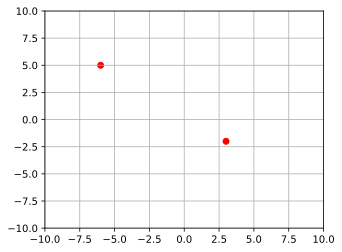

In [10]:
points = np.array([[3.0,-2.0],[-6.0,5.0]])    # point 1 & 2 in x,y coordinates; 

figcount += 1                                 # raise figure count about 1; 
plt.figure(figcount, figsize=(5,4))           # plot figure with spezific number and size; 
plt.xlim((-10.0,10.0))                        # axis limits; 
plt.ylim((-10.0,10.0))
plt.grid()                                    # grid on
plt.scatter(points[:,0], points[:,1], marker='o', color='red')         # plot the elemets of points; 
                                                                       # first the elements with row index 0 (x-Koordinates) 
                                                                       # then with column index 1 (y-koordinates); 
plt.show()   # show the plot; 

Find the equation of the straight line through these two points. Since there are two distinct points, there can be only a single line which can pass through these points.

The equation of a  **straight line in 2D can be written as
$ mx + c = y$.** Therefore, for the 2 points that are provided, we can write:

**$$
\begin{align}
3m &+ c = -2 \\
-6m &+ c = 5
\end{align}
$$**

In matrix form, this can be written as:

$$
\begin{bmatrix}
3 & 1 \\ -6 & 1 
\end{bmatrix}
\begin{bmatrix}
m \\ c 
\end{bmatrix} =
\begin{bmatrix}
-2 \\ 5 
\end{bmatrix}
$$


Write a **function that finds the value for $m$ and $c$ when the 2 points are specified as a numpy array.**


In [11]:
def straight_line(points):
    """
    Computes the slope (m) and intercept (c) of a straight line passing
    through 2 points

    :param points: numpy array of shape (2,2) where the first column contains
                   the xs and the second column contains the ys

    :returns: slope (m) and intercept (c) of a straight line passing through 
              the 2 input points
    """
    X, Y = np.expand_dims(points[:,0], axis=1), np.expand_dims(points[:,1], axis=1)
    # Insert a new axis at the axis position in the expanded array shape. 
    # np.expand.dims(a,axis) a = input array; axis = position were new axis is placed
    
    X_mat = np.concatenate((X, np.ones((2,1))), axis=1)
    # join a sequence along an exstisting axis; 
    # np.concatenade(a1,a2..,axis = 0, out = None) a1,a2, must have the same shape, axis = axis along arrays will be joined; 
    
    X_mat_inv = np.linalg.inv(X_mat)
    # multiplicative inverse of matrix; 
    
    solution = np.dot(X_mat_inv, Y)
    # numpy.dot(a, b, out=None) product of two arrays;
    #1 a and b are 1-D arrays, product of vectors (without complex conjugation).
    #2 a and b are 2-D arrays, matrix multiplication, also use matmul(a,b) or a @ b;
    #3 a or b is 0-D (scalar), multiply and using numpy.multiply(a, b) or a * b is preferred.
    #4 a is an N-D array and b is a 1-D array, a sum product last axis of a and b.
    #5 a is an N-D array and b is an M-D array (where M>=2), sum product last axis of a & second-to-last axis of b:
    # dot(a, b)[i,j,k,m] = sum(a[i,j,:] * b[k,:,m])

    m = solution[0,0]
    c = solution[1,0]
    
    # Your code ends here
    return m, c

print(m,c)

NameError: ignored

Let us test your function

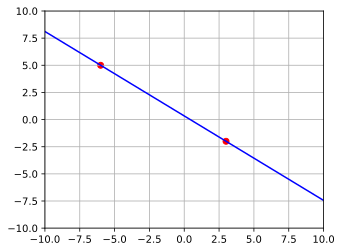

In [12]:
m, c = straight_line(points)

figcount += 1                                 # starts next figure, caus figure count +1
plt.figure(figcount, figsize=(5,4))           # plot the figure with size of; 
plt.xlim((-10.0,10.0))                        # SET x-axes limimts;   
plt.ylim((-10.0,10.0))                        # set y-axes limits; 
plt.grid()                                    # grid on; 
plt.scatter(points[:,0], points[:,1], marker='o', color='red')        # plot the elemets of points; 
                                                                      # first the elements with row index 0 (x-Koordinates) 
                                                                      # then with column index 1 (y-koordinates); 
x = np.array([-10.0,10.0])      # new np array for the linear regression line with x & y-axes limits from above; 
y = m*x + c                     # insert the equation of the linear regression line, calculated slope-paramters from above; 
plt.plot(x, y, color='blue')    # plot the new np array and the linear regression line through the points ; 
plt.show()                      # show the plot; 

### Introduction to the Pseudo-inverse <a name='pinv' />

Now you are given the following 3 points in 2D space. 

Point 1: $x = 3.0, y = -2.0$

Point 2: $x = -6.0, y = 5.0$

Point 3: $x = 7.0, y = 0.0$

Obviously, there is no single straight line that passes through all these points.

$$
\begin{align}
3m &+ c = -2 \\
-6m &+ c = 5 \\
7m &+ c = 0.0
\end{align}
$$

In matrix form, this can be written as:

$$
\begin{bmatrix}
3 & 1 \\ -6 & 1 \\ -7 & 1 
\end{bmatrix}
\begin{bmatrix}
m \\ c 
\end{bmatrix} =
\begin{bmatrix}
-2 \\ 5 \\ 0
\end{bmatrix}
$$

As you can see, the first matrix cannot be inverted directly. But **using the pseudo-inverse of the first matrix above, it is possible to find the equation of a straight line which passes as close as possible to all the three given points.** The Moore-Penrose pseudo-inverse of a matrix $A$ is given by **$(A^T A)^{-1} A^T$.** Write a function that computes the pseudo inverse in order to calculate the straight line for the situation described above.

<a href=#objectives> [go to top] </a>

In [0]:
def straight_line_pseudo(points):
    """
    Computes the slope (m) and intercept (c) of a straight line passing close
    to 3 points using the pseudo-inverse

    :param points: numpy array of shape (3,2) where the first column contains
                   the xs and the second column contains the ys

    :returns: slope (m) and intercept (c) of a straight line
    """
    # Your code starts here; You need to calculate m and c using the pseudo-inverse
    # For this you can use the form (A^T A)^{-1} A^T or the function np.linalg.pinv
    X, Y = np.expand_dims(points[:,0], axis=1), np.expand_dims(points[:,1], axis=1)
    # Insert a new axis at the axis position in the expanded array shape. 
    # np.expand.dims(a,axis) a = input array; axis = position were new axis is placed
    
    X_mat = np.concatenate((X, np.ones((3,1))), axis=1)
    # join a sequence along an exstisting axis; 
    # np.concatenade(a1,a2..,axis = 0, out = None) a1,a2, must have the same shape, axis = axis along arrays will be joined; 
    
    X_mat_inv = np.dot(np.linalg.inv(np.dot(X_mat.T,X_mat)),X_mat.T)
    # multiplicative inverse of matrix; 
    # This is same as X_mat_inv = np.linalg.pinv(X_mat)
    
    solution = np.dot(X_mat_inv, Y)
    # numpy.dot(a, b, out=None) product of two arrays;
    #1 a and b are 1-D arrays, product of vectors (without complex conjugation).
    #2 a and b are 2-D arrays, matrix multiplication, also use matmul(a,b) or a @ b;
    #3 a or b is 0-D (scalar), multiply and using numpy.multiply(a, b) or a * b is preferred.
    #4 a is an N-D array and b is a 1-D array, a sum product last axis of a and b.
    #5 a is an N-D array and b is an M-D array (where M>=2), sum product last axis of a & second-to-last axis of b:
    # dot(a, b)[i,j,k,m] = sum(a[i,j,:] * b[k,:,m])

    m = solution[0,0]
    c = solution[1,0]
    # Your code ends here
    return m, c

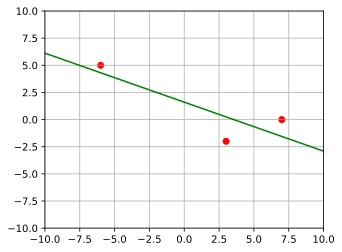

In [14]:
# Test your code
points = np.array([[3.0,-2.0],[-6.0,5.0],[7.0,0.0]])        # create 3 new points with x & y coordindate; 

m,c = straight_line_pseudo(points)                          # use the obove defined function to calculate the parameters m & c for the slope; 
figcount += 1                                               # figcount += 1 creates an new figure window; 
plt.figure(figcount, figsize=(5,4))                         # again define a size of window of this new figure
plt.xlim((-10.0,10.0))
plt.ylim((-10.0,10.0))                                      # again some axes-limits; 
plt.grid()                                                  # plot the grid;
plt.scatter(points[:,0], points[:,1], marker='o', color='red')          # plot the above defined points (first x-coordinates and then y-coordinates)
x = np.array([-10.0,10.0])                                              # plot the x-range of the linear regression line
y = m*x + c                                                             # calculate the linear regression with the parametres from def_straight_line & x-range 
plt.plot(x, y, color='green')                                           # plot a green regression line;
plt.show()

### Create a Dataset <a name='dataset' />

Let's create a small dataset

<a href=#objectives> [go to top] </a>

X:{X.shape}, Y:{Y.shape}, X_noisy:{X_noisy.shape}, Y_noisy:{Y_noisy.shape}


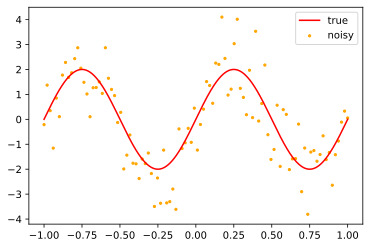

In [15]:
# Function for generating data 
def datagen(size=20, mu=0.0, sigma=0.0):
    X = np.linspace(-1.0, 1.0, num=size)                          
    # numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
    # returns spaced numbers in a special intervall; here from -1 to 1 in 20 sample-steps;
    
    Y = 2.0 * np.sin(2.0 * np.pi * X)                # The true function clacs sin and pi;        
    Y += np.random.normal(mu, sigma, Y.shape)        
    # Add some noise with numpy.random.normal(loc=0.0, scale=1.0, size=None)
    # gaussian distrinution => loc=mean, scale=stand.dev, size is single value if loc & scale are scalars; here size of Y; 
    return X, Y

# Visualize the data
X, Y = datagen(1000)                            # put x,y values to datagen-func to 1000; 
X_noisy, Y_noisy = datagen(100, sigma=1.0)      # pot x-noise & y_noise to datagen-funct of 100 values with stand.dev of 1; 
figcount += 1                                   
plt.figure(figcount)
plt.plot(X, Y, color='red', label='true')
# plot(x,y,z..., scalex=True, scaley=True, data=None, **kwargs)

plt.scatter(X_noisy, Y_noisy, color='orange', label='noisy', s=5)
# plt.scatter(x, y, s=None (markersize), c=None, marker=None, cmap=None, norm=None, 
# vmin=None, vmax=None, alpha=None, linewidths=None, 
# verts=<deprecated parameter>, edgecolors=None, *, plotnonfinite=False, data=None, **kwargs)

plt.legend()
# plots the obove defined labels of plots; 

# What is the shape of our data
print('X:{X.shape}, Y:{Y.shape}, X_noisy:{X_noisy.shape}, Y_noisy:{Y_noisy.shape}')

### Split the data into train and test sets <a name='split' />

<a href=#objectives> [go to top] </a>

In [16]:
# Divide the data into train and test sets
from sklearn.model_selection import train_test_split

# Your code starts here, use the function train_test_split with test_size=0.9
X_train, X_test, Y_train, Y_test = train_test_split(X_noisy, Y_noisy, test_size=0.9, random_state=random_seed)
# train_test_split(all arrays, test_size=float,int,None, random_state=int,seed used by rand.num genera., shuffle=boolean (None if using stratify), stratify=array)
# returns a list containing train-test splits of inpits;

print('Shape of X_train:{X_train.shape}, X_test:{X_test.shape}, Y_train:{Y_train.shape}, Y_test:{Y_test.shape}')

Shape of X_train:{X_train.shape}, X_test:{X_test.shape}, Y_train:{Y_train.shape}, Y_test:{Y_test.shape}


### General Form of Least-Squares Linear Regression  <a name='least-sq-reg' />

An ***linear* regression model** can be written in the form
$$y(\mathbf{x}; \mathbf{w}) = \sum_{i=0}^{M-1} w_i \varphi_i(\mathbf{x}) = \mathbf{w}^{\mathrm{T}} \phi(\mathbf{x})$$
where $\mathbf{x} = [x_1, \dots, x_N]^{\mathrm{T}}$ is **a vector corresponding to an input data point**, $\phi(\mathbf{x}) = [\varphi_0(\mathbf{x}), \dots, \varphi_{M-1}(\mathbf{x})]^{\mathrm{T}}$ is the vector of ***feature functions*** $\varphi_i(\mathbf{x})$, and the **weight vector** $\mathbf{w}$ **contains the parameters of the linear regression function**. (In our examples here, $N=1$, $\varphi_i(x) = x^i$, and $M-1$ is the degree of the polynomial regression function.)

If we stack all our **transposed *feature vectors* into the *design matrix***
$$\Phi(\mathbf{x}) = \begin{bmatrix}
\phi(\mathbf{x}_1)^{\mathrm{T}} \\
\phi(\mathbf{x}_2)^{\mathrm{T}} \\
\vdots \\
\phi(\mathbf{x}_N)^{\mathrm{T}}
\end{bmatrix}
= \begin{bmatrix}
           \varphi_0(x_{1}) & \varphi_1(x_{1}) & \cdots & \varphi_{M-1}(x_{1}) \\
           \varphi_0(x_{2}) & \varphi_1(x_{2}) & \cdots & \varphi_{M-1}(x_{2}) \\
           \vdots & \vdots & \ddots & \vdots\\
           \varphi_0(x_{N}) & \varphi_1(x_{N}) & \cdots & \varphi_{M-1}(x_{N}) \\
         \end{bmatrix}$$
then we can rewrite our **regression model and our squared error function** $\displaystyle E(\mathbf{w}) = \frac{1}{2} \sum_{n=1}^N \left(\mathbf{w}^{\mathrm{T}} \phi(\mathbf{x}_n) - t_n\right)^2$ and minimize the latter over $\mathbf{w}$ as follows: 
$$
\begin{align}
\mathbf{y} &= \Phi \mathbf{w} \\
E(\mathbf{w}) &= \frac{1}{2} (\Phi\mathbf{w} - \mathbf{t})^{\mathrm{T}} (\Phi\mathbf{w} - \mathbf{t}) \\
&= \frac{1}{2} \left((\Phi\mathbf{w})^{\mathrm{T}} \Phi\mathbf{w} - 2 (\Phi\mathbf{w})^{\mathrm{T}} \mathbf{t} + \mathbf{t}^{\mathrm{T}} \mathbf{t}\right) \\
&= \frac{1}{2} \left(\mathbf{w}^{\mathrm{T}} \Phi^{\mathrm{T}} \Phi\mathbf{w} - 2 \mathbf{w}^{\mathrm{T}} \Phi^{\mathrm{T}} \mathbf{t} + \mathbf{t}^{\mathrm{T}} \mathbf{t}\right) \\
\nabla_{\mathbf{w}} E(\mathbf{w}) &= 0 \\
&= \Phi^{\mathrm{T}} \Phi\mathbf{w} - \Phi^{\mathrm{T}} \mathbf{t} \\
\mathbf{w} &= \left(\Phi^{\mathrm{T}} \Phi\right)^{-1} \Phi^{\mathrm{T}} \mathbf{t}
\end{align}
$$

**Incidentally, $\left(\Phi^{\mathrm{T}} \Phi\right)^{-1} \Phi^{\mathrm{T}}$ is known as the *Moore-Penrose pseudo inverse* of $\Phi$.**

The function for creating the design matrix $\Phi$ is provided below.

<a href=#objectives> [go to top] </a>

In [17]:
def design_matrix(X, degree):
    """
    This function acceps a vector of 1D inputs and returns the design matrix
    
    :param X: Input array of shape (number_of_data_points,)
    :param degree: Degree of the desired polynomial
    :return: Design matrix in the form of a 2D array of shape (number_of_data_points, M)
    """
    X = np.expand_dims(X, axis=1)  # Dims should be (rows, 1), so vector input array with shape of number_of_data_points; 
    # expand the shape of an array, axis= x.. where the axis is replaced, 

    vec = np.power(X, 0)        # like binomial koeff, x power 0 = 1; 
    # First array elements raised to powers from second array, element-wise
    # numpy.power(x1, x2, /, out=None, *, where=True, casting='same_kind', order='K', dtype=None, subok=True[, signature, extobj]) = <ufunc 'power'>¶
    
    # raise the dimension of polinomial degree; 
    for d in range(1, degree+1):
        vec = np.concatenate((X, np.power(vec, d)), axis=1)  # Concatenate column vectors side by side np.concatenate((a1, a2, ...), axis=0, out=None)
    return vec

print(design_matrix(X_train, 5).shape)



# x param -> vec = input from x_train from above; 
# 5 = degree + 1 means 6 as output; 

(10, 6)


### Solve Least-Squares Linear Regression <a name='solve-least-sq-reg' />

Write a **function that computes $\mathbf{w}$, the parameters of the linear regression function using the design matrix and the target labels.**

<a href=#objectives> [go to top] </a>

In [0]:
def solve(design, target):
    """
    This function calculates the weights (coefficients) for regression
    
    :param design: Design matrix of shape (number_of_data_points, M)
    :param target: Training target values of shape (number_of_data_points,1)
    
    :return: weights of shape (M,1)
    """
    # Compute weights ("result") as per equation
    # Your code starts here; Use np.dot(a,b), np.transpose(a), np.linalg.inv(a)
    
    result = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(design), design)), np.transpose(design)), target)
    # dot product (important for all maths here) of (phi^T*phi)^-1*phi^T*t
    # t = target; phi = design, phi^T = np.transpose(design), phi^-1 = np.inverse(design); np.dot(in front of every matrix operation)

    # Your code ends here
    # Convert into shape with 2 dimensions and return the result
    result = np.expand_dims(result, axis=1)
    # output of all results in one axis; 
    return result

### Visualize predictions for different polynomial degrees  <a name='vis_pred' />

<a href=#objectives> [go to top] </a>

LinAlgError: ignored

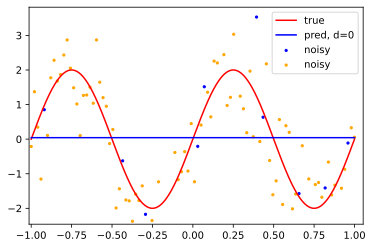

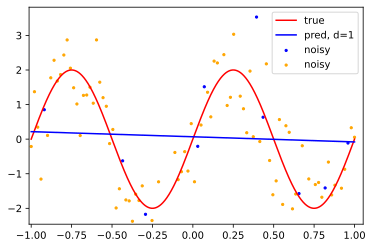

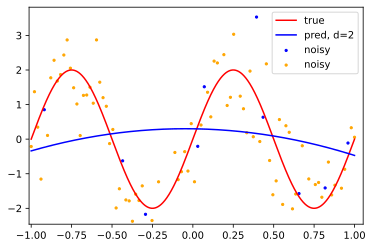

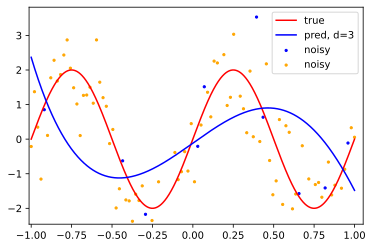

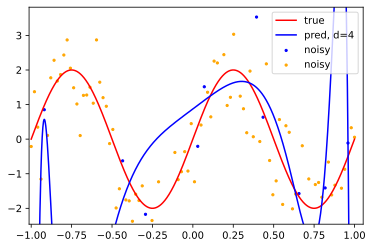

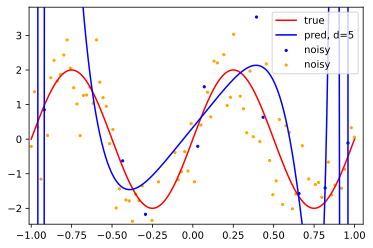

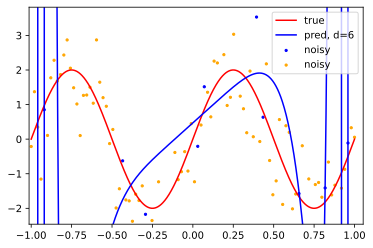

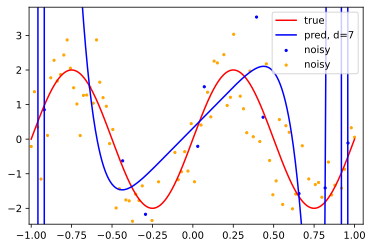

In [19]:
for d in range(10):
    # Compute weights from training data
    w = solve(design_matrix(X_train, d), Y_train)
    # with d in from 0 to 10; 
    # solve(functionname,symbols,target) is the above defined function with design_matix (x) and target (y)
    # first argument for solve() is an equation (equaled to zero) and the second argument is the symbol that we want to solve the equation for.
    # equation is the funct-design matrix above; 
    
    # Compute predictions using the computed weights
    Y_pred = np.dot(design_matrix(X, d), w)
    # dot product of defined design_matix with X and degree (d) and the above calculated weight factor/variable; 

    # Visualize predictions
    figcount += 1                                                   # enumerate the next figure in this notebook; 
    plt.figure(figcount)                                            # plot it; 
    plt.scatter(X_train, Y_train, color='blue', label='noisy', s=5) # scatter plots with markersize 5 where to show difference between training data and test data
    plt.scatter(X_test, Y_test, color='orange', label='noisy', s=5) 
    plt.plot(X, Y, color='red', label='true')                        # plot of the sin function from above so that the data is seperated; 
    plt.autoscale(False)                                                  # plt.autoscale(False) would cut plot away; 
    plt.plot(X, Y_pred, color='blue', label=f'pred, d={d}')          # plot x data with datagen-funct and y_pred with coputed weights and with d = degree = 0 -> straight line; 
    plt.legend()

### Check the errors on the train and test set <a name='sq_error' />

The **squared error is defined by**
$$ 
E(\mathbf{w}) = \frac{1}{2} \sum\limits_{n=1}^N \{y(x_n, \mathbf{w}) -t_n\}^2
$$ 
The **Root Mean Squared (RMS) error quantizes the error over the whole dataset**. It is defined by 
$$
E_{RMS} = \sqrt{(2E(\mathbf{w^*)}/N)}
$$
where $N$ is the **number of data points** and $E(\mathbf{w^*})$ is the **squared error as defined above**. Write a **function that accepts the predicted value and the target values return the RMS error**.

<a href=#objectives> [go to top] </a>

In [0]:
def rms_error(Y_pred, Y_target):
    """
    Function to calculate the RMS error
    
    :param Y_pred: Predicted targets of shape (number_of_data_points,)
    :param Y_target: Actual targets
    
    :return: Scalar RMS value
    """
    # Your code starts here; use the functions np.square and np.sqrt
    sq_error = np.square(Y_pred - Y_target)
    # square(x, /, out=None, *, where=True, casting='same_kind', order='K', dtype=None, subok=True[, signature, extobj])
    # where = array, out = array or tuple of specifying the output; 
    # returns ^(array or scalar) elementwise square of an intput; 

    rms = np.sqrt(np.sum(sq_error)/Y_target.shape[0])
    # sqrt(x, /, out=None, *, where=True, casting='same_kind', order='K', dtype=None, subok=True[, signature, extobj])
    # retunrs non-negative outputs of an array, elementwise;
    # out & where are the same as in pn.sqare above; 
    
    # Your code ends here
    return rms

[array([[0.04210899]]), array([[-0.14845768],
       [ 0.06760172]]), array([[-0.06581528],
       [-0.70475152],
       [ 0.29940131]]), array([[ 3.3076195 ],
       [-5.23158914],
       [ 0.55803815],
       [-0.11568945]]), array([[   3.51223311],
       [ -31.848272  ],
       [ 119.7388473 ],
       [-135.23974821],
       [   0.87374581]]), array([[ 5.74430783e+00],
       [-4.90844560e+01],
       [ 6.47131966e+02],
       [-2.46084883e+04],
       [ 2.57051293e+05],
       [ 3.37968593e-01]]), array([[ 4.20138097e+00],
       [-5.94848591e+01],
       [ 5.15886388e+03],
       [-9.15136435e+06],
       [ 1.49684042e+11],
       [ 7.94651120e+16],
       [ 4.71007769e-01]]), array([[ 4.76361613e+00],
       [-9.72314904e+01],
       [ 8.33677153e+04],
       [-1.19523716e+11],
       [ 9.71760931e+21],
       [ 5.49839476e+51],
       [ 1.49216711e+97],
       [ 3.19504661e-01]])]
[[ 4.76361613e+00]
 [-9.72314904e+01]
 [ 8.33677153e+04]
 [-1.19523716e+11]
 [ 9.71760931e+21]
 [ 

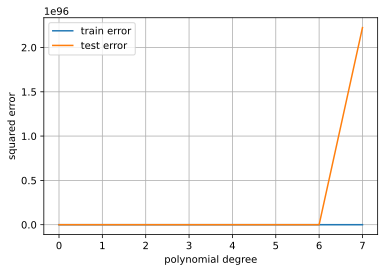

In [30]:
def poly_error_plotter(X_train, Y_train, X_test, Y_test, poly_start, poly_end, figcount):
    """
    Function to plot the RMS error over a range of polynomial degrees
    
    :param X_train: Training inputs of shape (number_of_data_points,) 
    :param Y_train: Labels for training inputs
    :param X_test: Test inputs
    :param Y_test: Labels for test inputs
    :param poly_start: Starting polynomial degree
    :param poly_end: Ending polynomial degree
    :param figcount: Count of figure to keep track of figures
    
    :return: A list of weight vectors (one for each polynomial degree)
    """
    # create empty Lists using for plotting results
    poly_degree_list = []
    train_error_list = []
    test_error_list = []

    # Let's also save the weights to analyze later as an empty list
    weights = []


    # set up a for-loop to compute all statistic error operations one after another, 
    for poly_degree in np.arange(poly_start,poly_end):

        # Design matrix for training data over  X_train and poly_degree form poly_start till poly_end;
        design_train = design_matrix(X_train,poly_degree)

        # Compute weights
        w = solve(design_train, Y_train)
        weights.append(w)
        # list.append(item) ; here list's name is weight & item is calculated w 

        # Compute predictions on and error on training data
        Y_pred_train = np.dot(design_train, w)
        # dot product 

        # np.squeeze is used to reshape into 1D vector
        train_rms_error = rms_error(np.squeeze(Y_pred_train), Y_train)
        # call the defined funct: rms_error and calculate the np.squeeze
        # squeeze(a, axis=None,int,tuple) remove single-dimensional entries from the shape of an array

        # Design matrix for test data of X_test and the poly_degree loop; 
        design_test = design_matrix(X_test,poly_degree)

        # Compute predictions on and error on test data
        Y_pred_test = np.dot(design_test, w)
        test_rms_error = rms_error(np.squeeze(Y_pred_test), Y_test)
        # again call the rms_error funct. and "squeeze the single-dims" out of the array y_pred_test

        # fill all lists with in the for-loop calculated variables: 
        poly_degree_list.append(poly_degree)
        train_error_list.append(train_rms_error)
        test_error_list.append(test_rms_error)

    # Plot results with all lists and labeled functions and axes; 
    plt.figure(figcount)
    plt.plot(poly_degree_list, train_error_list, label='train error')
    plt.plot(poly_degree_list, test_error_list, label='test error')
    plt.xlabel('polynomial degree')
    plt.ylabel('squared error')
    plt.grid()
    plt.legend()
    
    return weights

figcount += 1
weights = poly_error_plotter(X_train, Y_train, X_test, Y_test, 0, 8, figcount)
# use the defined function to plot the whole thing with values before defined with poly_start = 0 and poly_end = 8; 
type(weights)
print(weights)              # prints the whole weight vec;
print(weights[-1])          # the logest/last weight vect;
print(weights[-1].shape[0]) # prints the number of rows and columns of the longest weight vec;

### Overfitting <a name='overfit' />

The above plot shows a clear effect of overfitting at high polynomial degrees: The training error continues to go down, while the test error explodes.

<a href=#objectives> [go to top] </a>

### Look at the **coefficients (weights)** <a name='wt_coeffs' />

<a href=#objectives> [go to top] </a>

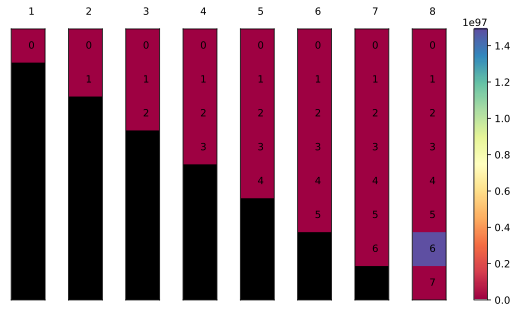

[[ 4.76361613e+00]
 [-9.72314904e+01]
 [ 8.33677153e+04]
 [-1.19523716e+11]
 [ 9.71760931e+21]
 [ 5.49839476e+51]
 [ 1.49216711e+97]
 [ 3.19504661e-01]]


In [25]:
from matplotlib import cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

def plot_weights(weights):
    """
    Function for plotting weights
    Don't bother with the details of this function
    """
    
    # Create subplots where each weight vector is displayed as a subplot
    # Subplots will be arranged in 1 row and len(weights) columns 
    fig, ax = plt.subplots(1, len(weights), sharex=False, sharey=True, figsize=(10,5))
    #fig,ax = plt.subplot(nrows,ncols,index (starts at one),prjection{None,'aitoff','hammer','lambert','molleweide','polar',rectilinear',str},polar = boolean, 
    # sharex,sharey = (axis will ahve the same limits and ticks and scale), label= str, 
    # all other paramterts for figure and axes)
    # returns axes in figure; 
    

    # Adjust the padding
    fig.subplots_adjust(wspace=0.3)  # value of wspace in cm; 
    # fig.subplots_adjust(left=value,None, bottom=value,None, right=value,None, top=value,None, wspace=value,None, hspace=value,None)
    # tunes all sides of the subplot & width and height reserved for space between subplots in fraction of average axis width & height; 

    # Fix the subplots to the top with a for-looping through: 
    for a in ax:                        # axes.set_anchor(self, anchor, share=,boolean,False) Define the anchor location
        a.set_anchor('N')               # here a is the ax and 'N' refers to north location; 


    # Find the length of the largest weight vector
    largest_dim = weights[-1].shape[0]        # weight is a list [-1] for longest array vect in weights; 
    # prints the number of rows and columns of the longest weight vec;

    # Pad each weight vector to make all of them of the same length
    # The padded entries will be plotted in black (eingebettet):
    for i,w in enumerate(weights):                            # first enumerate all vectors 
        num_zeros = largest_dim - w.shape[0]                  # save diff of actual w-vect to lognest as zeros
        show_w = np.pad(w, ((0,num_zeros), (0,0)))            # w = array, (0,num_zeros), (0,0) = (before,after) stat_lenght or end_constant_etc values, 
        # np.pad(array, pad_width=sequence,array,int, mode=str or funct like 'constant', stat_length=sequ,int, constant_values=sequ,scal, end_values=sequ,scal, reflect_type='even','odd'}
        
        show_w = np.ma.masked_where(show_w == 0, show_w)      # masks an array where the specified condition is met; 
        # np.ma.masked_where(condition == array, a=array to mask, copy=True)
        
        cm.Spectral.set_bad(color='black')
        # cm.Spectral.set() 

        # For showing the indices of the weight vector
        for j in range(w.shape[0]):                             # show rows and columns of w
            label = str(j)                                      # label the j indizes of vect w with strings; 
            ax[i].text(0.1, j, label,ha='center',va='center')   # specify the size & position of labels of w refering to axes   

        # Add a label for each weight vector on top
        ax[i].text(0.1, -1, f'{w.shape[0]}', ha='center',va='center')

        # Do not show axis ticks for all axis label of w, cause every entry of w column has its own axis ticks; 
        ax[i].get_xaxis().set_ticks([])
        ax[i].get_yaxis().set_ticks([])

        # For setting the colormap
        flatweights = [w for weight in weights for w in weight]
        im = ax[i].imshow(show_w, interpolation='nearest', cmap='Spectral', vmin=min(flatweights), vmax=max(flatweights))
        # Axes.imshow(self, X=array, cmap=str,cmap, norm=nrom, aspect={'equal', 'auto'} or float, interpolation=str, alpha=scal,array, vmin=scal,array, vmax=scla, 
        # origin={'upper', 'lower'}, extent=calars (left, right, bottom, top), filternorm=bool, filterrad=4.0, #
        # resample=bool, url=str, *, data=str, other artist propterties) 
        # returns a axes image of a data on 2d regular raster; 

    fig.colorbar(im, ax=ax.ravel().tolist())
    # fig.colorbar(mappable=None,image,cm.ScalarMappable(norm=norm,cmap=cmap), cax=object, ax=list of axes, use_gridspec = bool, 
    # other arguments for colorbar & axes properties)
    # adds a colorbar to this plot

    plt.show()
    
plot_weights(weights)
type(weights)
print(weights[-1])

### Regularization with Ridge Regression <a name='ridge' />

In order to , **reduce the *wiggliness* of the fitted function (i.e. overfitting)** we need to **discourage the weights from reaching very high values**. One way of doing so is to **include a penalty for high weights in the error function.**

Thus, the r**egularized squared error becomes**

$$
\tilde{E}(\mathbf{w})=\frac{1}{2}\sum\limits_{n=1}^{N}\{ y(x_n, \mathbf{w}) - t_n\}^2 + \frac{\lambda}{2}\vert\vert\mathbf{w}\vert\vert^2
$$
where $\vert\vert\mathbf{w}\vert\vert^2=\mathbf{w}^T \mathbf{w}=w_0^2+w_1^2+\cdots+w_M^2$ and **$\lambda$ controls the importance of the regularization** term. The closed-form solution in this case is given by 
$$
\mathbf{w}=(\Phi^T \Phi + \lambda \mathbf{I})^{-1}\Phi^T \mathbf{t}
$$

This kind of regularization is also known as **L2 regularization because we use the L2 norm of the weights (coefficients) as a regularization term.**

<a href=#objectives> [go to top] </a>

In [0]:
# Function to produce predictions using regularization
def solve_regularize(design, target, regu_coeff):
    """
    This function calculates the weights (coefficients) for regression with regularization
    
    :param design: Design matrix of shape (number_of_data_points, M)
    :param target: Training target values of shape (number_of_data_points,1)
    :param regu_coeff: Scalar value for regularization coefficient lambda
    
    :return: weights of shape (M,1)
    """
        
    # Compute weights as per equation

    # Intermediate computation
    phi_t_phi = np.dot(np.transpose(design), design)      # computes the dot.product; 
    
    # Create identity matrix of required shape and returns 2-D array with ones on the diagonal and zeros elsewhere.
    I = np.eye(phi_t_phi.shape[0])            
    # eye(rows, M=columns, k=int of diagonal, order={‘C’, ‘F’})
    
    # Your code starts here
    result = np.dot(np.dot(np.linalg.inv(phi_t_phi + regu_coeff*I), np.transpose(design)), target)
    # is the formula: w = (Φ^T*Φ + λ*I)^-1 * Φ^T*t 
    # w = weight, phi = design, lambda = regu_coeff, I = I, t = target;

    # Your code ends here
    # Convert into shape with 2 dimensions and return the result
    result = np.expand_dims(result, axis=1)
    return result

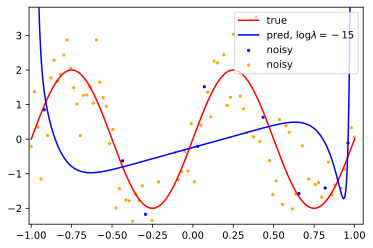

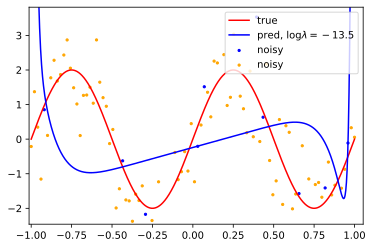

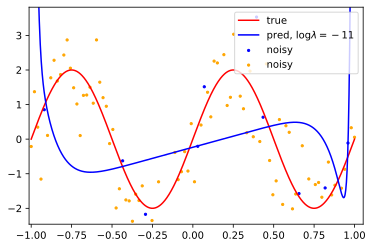

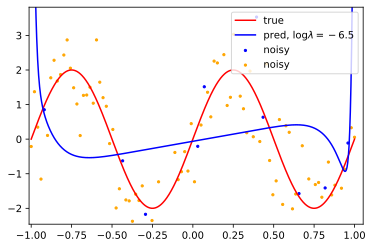

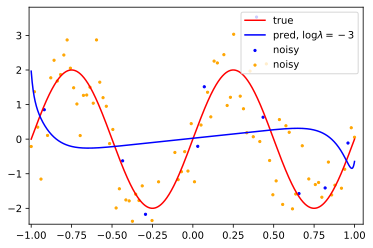

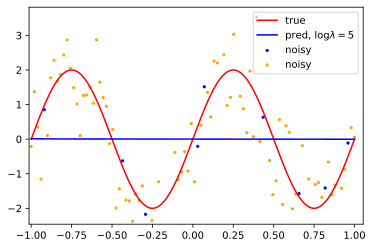

In [32]:
# new design training matrix
poly_degree = 9
design_train = design_matrix(X_train, poly_degree)

for coeff_pow in [-15, -13.5, -11, -6.5, -3, 5]:
    w = solve_regularize(design_train, Y_train, np.exp(coeff_pow)) # calls the func and use new coeffs; 
    
    # Compute predictions using the computed weights
    Y_pred = np.dot(design_matrix(X, poly_degree), w) 

    # Visualize predictions
    figcount += 1
    plt.figure(figcount)
    plt.scatter(X_train, Y_train, color='blue', label='noisy', s=5)
    plt.scatter(X_test, Y_test, color='orange', label='noisy', s=5)
    plt.plot(X, Y, color='red', label='true')
    plt.autoscale(False)
    plt.plot(X, Y_pred, color='blue', label=f'pred, $\log\lambda={coeff_pow}$')
    plt.legend()

### Train and Test error with Regularization <a name='ridge_error' />

<a href=#objectives> [go to top] </a>

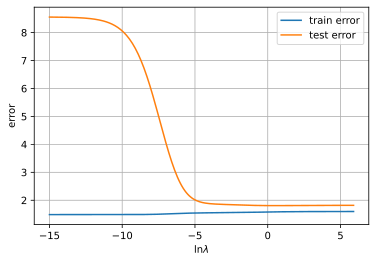

In [33]:
# creates new empty Lists used for plotting results
reg_coeff_pow_list = []
reg_train_error_list = []
reg_test_error_list = []

# Let's also save the weights to analyze later
reg_weights = []

# Range of coefficient powers we will try out
coeff_pow_range = np.arange(-15, 6, 0.1)
# np.arange(start = number, stop = number, step number, dtype=None)


# Check what the error was without regularization for this polynomial degree
# (see error plot without regularization)
poly_degree = 9  

# Design matrices for training and test data
design_train = design_matrix(X_train, poly_degree)
design_test  = design_matrix(X_test,  poly_degree)

for coeff_pow in coeff_pow_range:
    # Compute weights
    w = solve_regularize(design_train, Y_train, np.exp(coeff_pow))  # call func and compute weights with new numbers

    # Compute predictions on and error on training data
    Y_pred_train = np.dot(design_train, w)                          
    # np.squeeze is used to reshape into 1D vector
    train_rms_error = rms_error(np.squeeze(Y_pred_train), Y_train)

    # Compute predictions on and error on test data again with reshape to 1D; 
    Y_pred_test = np.dot(design_test, w)
    test_rms_error = rms_error(np.squeeze(Y_pred_test), Y_test)
    
    # fill up all empty lists with calculated values friom above: 
    reg_coeff_pow_list.append(coeff_pow)
    reg_train_error_list.append(train_rms_error)
    reg_test_error_list.append(test_rms_error)
    reg_weights.append(w)
    
# Plot results
figcount += 1
plt.figure(figcount)
plt.plot(reg_coeff_pow_list, reg_train_error_list, label='train error')
plt.plot(reg_coeff_pow_list, reg_test_error_list, label='test error')
plt.xlabel('$\ln \lambda$')
plt.ylabel('error')
plt.grid()
plt.legend()

### Coefficients with Ridge Regression <a name='ridge_coeffs' />

<a href=#objectives> [go to top] </a>

(10, 210)


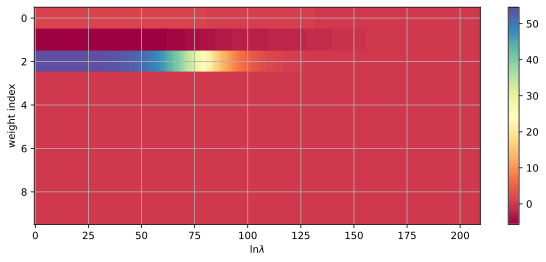

In [41]:
# Covert list of weights to weight array
reg_show_weights = np.concatenate(reg_weights, axis=1)

def plot_weights2(weights, figcount, colormap='Spectral'):
    """
    Function to plot the weights for polynomials of degree M for different regularization coefficients
    
    :param weights: List of weight arrays, in which each element is of shape (M,1)
    :param figcount: Figure count for pyplot
    :param colormap: Colormap for plotting
    
    :return: Nothing
    """
    # Use an appropriate colormap by creating it
    cmap = cm.get_cmap(colormap, 100)   
    cmap.set_bad('w')                   # set the colormap of the vect padding to 'w'


    # Finally plot the results
    plt.figure(figcount, figsize=(10,4))
    print(weights.shape)
    plt.imshow(weights, interpolation='nearest', cmap=cmap, aspect='auto')
  

    # Grab the current axis
    ax = plt.gca()
    # get the current axes instance on current figure, matching the given keyowerds args or create one; 
    #ax.set_xticks([i for i,_ in enumerate(coeff_pow_range)])
    #ax.set_xticklabels(coeff_pow_range)
    ax.set_xlabel('$\ln \lambda$')
    ax.set_ylabel('weight index')
    plt.grid()
    plt.colorbar()
    
figcount += 1
plot_weights2(reg_show_weights,figcount)

### Why is this form of regularization called *ridge regression*? <a name='ridge_name' />

Lets take a l**ook at our above solver function `solve_regularize()` again.**

The **$\Phi^T \Phi$ term is a square matrix and when we add $\lambda \mathbf{I}$ to it, the effect is that of amplifying the diagonal values of this matrix.** When we plot it, it looks like a ridge (a long, narrow hilltop).

<a href=#objectives> [go to top] </a>

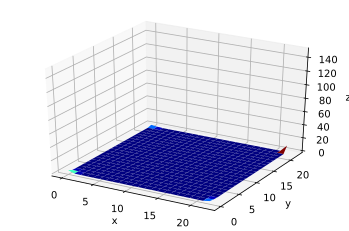

In [42]:
from mpl_toolkits import mplot3d

poly_degree = 22

# Design matrix for training data
design_train = design_matrix(X_train,poly_degree)

phi_t_phi = np.dot(np.transpose(design_train), design_train)


# Function for 3D plotting
def three_d_plot(matrix, figcount):

    fig = plt.figure(figcount)
    ax = plt.axes(projection='3d')      #  returns add axes class depends on the projection used. rectilinear projection are used and projections.polar.PolarAxes if polar projection are used.
    # plt.axes(arg=none,4-tuple, projection   {None, 'aitoff', 'hammer', 'lambert', 'mollweide', 'polar', 'rectilinear', str}, 
    # polar=bool, sharex,sharey = axes, label = str, )
    X, Y = np.meshgrid(range(matrix.shape[0]), range(matrix.shape[1]))
    # np.meshgrid(x_i, indexing = {‘xy’, ‘ij’}, spars = bool, copy = bool) which retuns coordinate matrices from coordinates vectors
    ax.plot_surface(X,Y,matrix, rstride=1, cstride=1, cmap='jet', edgecolor='none')
    #plot_surface(X, Y, Z, rstride, cstride, rcount, ccount, color, cmap, facecolors, norm, vmin, vmax, shade)
    # specific 3D surface plot ; 
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_zlim(0,150)
    
figcount += 1
three_d_plot(phi_t_phi,figcount)

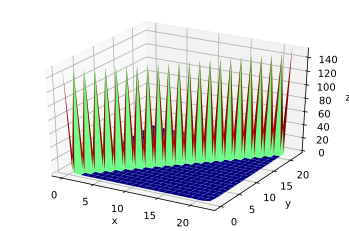

In [36]:
regu_coeff = np.exp(5)
# Create identity matrix of required shape
I = np.eye(phi_t_phi.shape[0])
phi_t_phi_new = phi_t_phi + regu_coeff*I

figcount += 1
three_d_plot(phi_t_phi_new,figcount)

<a href=#objectives> [go to top] </a>